# TELECOM CHURN ANALYSIS.
    
    Objective: To model the probability of the churn rate using customer features

LOADING DATASET

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
churn=pd.read_csv('Churn.csv',index_col=None)

In [5]:
churn

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

EXPLORATORY DATA ANALYSIS

#dropping unnecessary colummn(data cleaning)

In [6]:
churn = churn.drop('Unnamed: 0',axis=1)
churn.head(2)

state      area.code  account.length voice.plan  voice.messages intl.plan  \
0    KS  area_code_415             128        yes              25        no   
1    OH  area_code_415             107        yes              26        no   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls day.charge  \
0       10.0           3          2.7     265.1        110      45.07   
1       13.7           3          3.7     161.6        123      27.47   

  eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4         99       16.78       244.7           91         11.01   
1    195.5        103       16.62       254.4          103         11.45   

   customer.calls churn  
0               1    no  
1               1    no

In [7]:
churn.shape 
#5000 customers are taken in consideration to model the churn rate with 20 features

(5000, 20)

In [7]:
#Renaming the columns for better understanding
churn.rename(columns = {'area.code':'area code', 'account.length':'account length','voice.plan':'voice mail plan','voice.messages':'number vmail messages', 'intl.plan':'international plan','intl.mins':'total intl minutes','intl.calls':'total intl calls', 'intl.charge':'total intl charge','day.mins':'total day minutes'
                    ,'day.calls':'total day calls','day.charge':'total day charge', 'eve.mins':'total eve minutes','eve.calls':'total eve calls','eve.charge':'total eve charge','night.mins':'total night minutes', 'night.calls':'total night calls','night.charge':'total night charge','customer.calls':'customer service calls'}, inplace = True)

In [8]:
#extracting the area code as it in not important
churn['area code'] = churn['area code'].str.extract('(\d+)')
churn.head()

state area code  account length voice mail plan  number vmail messages  \
0    KS       415             128             yes                     25   
1    OH       415             107             yes                     26   
2    NJ       415             137              no                      0   
3    OH       408              84              no                      0   
4    OK       415              75              no                      0   

  international plan  total intl minutes  total intl calls  total intl charge  \
0                 no                10.0                 3               2.70   
1                 no                13.7                 3               3.70   
2                 no                12.2                 5               3.29   
3                yes                 6.6                 7               1.78   
4                yes                10.1                 3               2.73   

   total day minutes  total day calls total day charge total eve minutes  \
0              265.1              110            45.07             197.4   
1              161.6              123            27.47             195.5   
2              243.4              114            41.38             121.2   
3              299.4               71             50.9              61.9   
4              166.7              113            28.34             148.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total night charge  customer service calls churn  
0               11.01                       1    no  
1               11.45                       1    no  
2                7.32                       0    no  
3                8.86                       2    no  
4                8.41                       3    no

In [10]:
#checking for the duplicate
churn[churn.duplicated()] #no duplicates in the dataset

Empty DataFrame
Columns: [state, area code, account length, voice mail plan, number vmail messages, international plan, total intl minutes, total intl calls, total intl charge, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, customer service calls, churn]
Index: []

In [11]:
#checking for the datatypes of each customer faetures
churn.dtypes

state                      object
area code                  object
account length              int64
voice mail plan            object
number vmail messages       int64
international plan         object
total intl minutes        float64
total intl calls            int64
total intl charge         float64
total day minutes         float64
total day calls             int64
total day charge           object
total eve minutes          object
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
customer service calls      int64
churn                      object
dtype: object

In [12]:
#checking the unique value of the datatypes
print(f'Unique area codes: {len(churn["area code"].unique())}' )
print(f'Unique states: {len(churn["state"].unique())}' )
print(f'Unique int plan values: {len(churn["international plan"].unique())}' )
print(f'Unique voice mail plan values: {len(churn["voice mail plan"].unique())}' )
print(f'Unique number vmail messages values: {len(churn["number vmail messages"].unique())}' )
#Here we can see there are 3 area code for all 51 states

Unique area codes: 3
Unique states: 51
Unique int plan values: 2
Unique voice mail plan values: 2
Unique number vmail messages values: 48


In [9]:
#converting the datatype
churn["area code"] = churn['area code'].astype('int')
churn["total day charge"] = churn['total day charge'].astype('float')
churn["total eve minutes"] = churn['total eve minutes'].astype('float')

In [14]:
#Checking for missing values
churn.isnull().sum()

state                      0
area code                  0
account length             0
voice mail plan            0
number vmail messages      0
international plan         0
total intl minutes         0
total intl calls           0
total intl charge          0
total day minutes          0
total day calls            0
total day charge           7
total eve minutes         24
total eve calls            0
total eve charge           0
total night minutes        0
total night calls          0
total night charge         0
customer service calls     0
churn                      0
dtype: int64

##Treating missing values using computation technique##

In [15]:
churn['total day charge'].describe()
#the mean value is in the range  of other values

count    4993.000000
mean       30.653501
std         9.166356
min         0.000000
25%        24.430000
50%        30.620000
75%        36.750000
max        59.760000
Name: total day charge, dtype: float64

In [16]:
churn['total eve minutes'].describe()
#the mean value is in the range of other values

count    4976.000000
mean      200.580326
std        50.554637
min         0.000000
25%       166.275000
50%       201.000000
75%       234.100000
max       363.700000
Name: total eve minutes, dtype: float64

In [10]:
#Filling the missing values with mean 
churn['total day charge'].fillna(int(churn['total day charge'].mean()),inplace=True)
churn['total eve minutes'].fillna(int(churn['total eve minutes'].mean()),inplace=True)
churn.head(20)


state  area code  account length voice mail plan  number vmail messages  \
0     KS        415             128             yes                     25   
1     OH        415             107             yes                     26   
2     NJ        415             137              no                      0   
3     OH        408              84              no                      0   
4     OK        415              75              no                      0   
5     AL        510             118              no                      0   
6     MA        510             121             yes                     24   
7     MO        415             147              no                      0   
8     LA        408             117              no                      0   
9     WV        415             141             yes                     37   
10    IN        415              65              no                      0   
11    RI        415              74              no                      0   
12    IA        408             168              no                      0   
13    MT        510              95              no                      0   
14    IA        415              62              no                      0   
15    NY        415             161              no                      0   
16    ID        408              85             yes                     27   
17    VT        510              93              no                      0   
18    VA        510              76             yes                     33   
19    TX        415              73              no                      0   

   international plan  total intl minutes  total intl calls  \
0                  no                10.0                 3   
1                  no                13.7                 3   
2                  no                12.2                 5   
3                 yes                 6.6                 7   
4                 yes                10.1                 3   
5                 yes                 6.3                 6   
6                  no                 7.5                 7   
7                 yes                 7.1                 6   
8                  no                 8.7                 4   
9                 yes                11.2                 5   
10                 no                12.7                 6   
11                 no                 9.1                 5   
12                 no                11.2                 2   
13                 no                12.3                 5   
14                 no                13.1                 6   
15                 no                 5.4                 9   
16                 no                13.8                 4   
17                 no                 8.1                 3   
18                 no                10.0                 5   
19                 no                13.0                 2   

    total intl charge  total day minutes  total day calls  total day charge  \
0                2.70              265.1              110             45.07   
1                3.70              161.6              123             27.47   
2                3.29              243.4              114             41.38   
3                1.78              299.4               71             50.90   
4                2.73              166.7              113             28.34   
5                1.70              223.4               98             37.98   
6                2.03              218.2               88             37.09   
7                1.92              157.0               79             26.69   
8                2.35              184.5               97             31.37   
9                3.02              258.6               84             43.96   
10               3.43              129.1              137             21.95   
11               2.46              187.7              127             31.91   
12           

In [11]:
##converting catagorical data to binary data using label encoder
le = LabelEncoder()
churn['churn'] = le.fit_transform(churn['churn'])
churn['voice mail plan'] = le.fit_transform(churn['voice mail plan'])
churn['international plan'] = le.fit_transform(churn['international plan'])
churn

state  area code  account length  voice mail plan  number vmail messages  \
0       KS        415             128                1                     25   
1       OH        415             107                1                     26   
2       NJ        415             137                0                      0   
3       OH        408              84                0                      0   
4       OK        415              75                0                      0   
...    ...        ...             ...              ...                    ...   
4995    HI        408              50                1                     40   
4996    WV        415             152                0                      0   
4997    DC        415              61                0                      0   
4998    DC        510             109                0                      0   
4999    VT        415              86                1                     34   

      international plan  total intl minutes  total intl calls  \
0                      0                10.0                 3   
1                      0                13.7                 3   
2                      0                12.2                 5   
3                      1                 6.6                 7   
4                      1                10.1                 3   
...                  ...                 ...               ...   
4995                   0                 9.9                 5   
4996                   0                14.7                 2   
4997                   0                13.6                 4   
4998                   0                 8.5                 6   
4999                   0                 9.3                16   

      total intl charge  total day minutes  total day calls  total day charge  \
0                  2.70              265.1              110             45.07   
1                  3.70              161.6              123             27.47   
2                  3.29              243.4              114             41.38   
3                  1.78              299.4               71             50.90   
4                  2.73              166.7              113             28.34   
...                 ...                ...              ...               ...   
4995               2.67              235.7              127             40.07   
4996               3.97              184.2               90             31.31   
4997               3.67              140.6               89             23.90   
4998               2.30              188.8               67             32.10   
4999               2.51              129.4              102             22.00   

      total eve minutes  total eve calls  total eve charge  \
0                 197.4               99             16.78   
1                 195.5              103             16.62   
2                 121.2              110             10.30   
3                  61.9               88              5.26   
4                 148.3              122             12.61   
...                 ...              ...               ...   
4995              223.0              126             18.96   
4996              256.8               73             21.83   
4997              172.8              128             14.69   
4998              171.7               92             14.59   
4999              267.1              104             22.70   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
4995                297.5                116 

In [19]:
churn.isnull().sum()
#checking for the null values after cleaning the dataset

state                     0
area code                 0
account length            0
voice mail plan           0
number vmail messages     0
international plan        0
total intl minutes        0
total intl calls          0
total intl charge         0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
customer service calls    0
churn                     0
dtype: int64

DATA VISUALIZATION

#comparing each customer feature column with the churn column

In [20]:
#checking for the correlation of the customer features
churn.corr()

area code  account length  voice mail plan  \
area code                1.000000       -0.018054        -0.003006   
account length          -0.018054        1.000000        -0.006650   
voice mail plan         -0.003006       -0.006650         1.000000   
number vmail messages   -0.003399       -0.014575         0.954508   
international plan       0.032107        0.014681         0.009054   
total intl minutes      -0.004154        0.001291         0.004116   
total intl calls        -0.013623        0.014277        -0.007525   
total intl charge       -0.004219        0.001292         0.004165   
total day minutes       -0.019118       -0.001017         0.002059   
total day calls         -0.019314        0.028240        -0.001735   
total day charge        -0.019326       -0.000791         0.001865   
total eve minutes        0.007684       -0.008704         0.022969   
total eve calls         -0.012300        0.009143        -0.005916   
total eve charge         0.007114       -0.009587         0.023332   
total night minutes      0.002084        0.000668         0.005524   
total night calls        0.014657       -0.007825         0.009176   
total night charge       0.002070        0.000656         0.005522   
customer service calls   0.020921       -0.001445        -0.014453   
churn                    0.010195        0.021203        -0.110698   

                        number vmail messages  international plan  \
area code                           -0.003399            0.032107   
account length                      -0.014575            0.014681   
voice mail plan                      0.954508            0.009054   
number vmail messages                1.000000            0.011947   
international plan                   0.011947            1.000000   
total intl minutes                   0.002463            0.031799   
total intl calls                     0.000124            0.004493   
total intl charge                    0.002505            0.031751   
total day minutes                    0.005381            0.028138   
total day calls                      0.000883            0.008102   
total day charge                     0.005196            0.028044   
total eve minutes                    0.018852            0.019936   
total eve calls                     -0.003954            0.002505   
total eve charge                     0.019496            0.021234   
total night minutes                  0.005541           -0.026508   
total night calls                    0.002676            0.005623   
total night charge                   0.005535           -0.026510   
customer service calls              -0.007086           -0.012974   
churn                               -0.097633            0.259123   

                        total intl minutes  total intl calls  \
area code                        -0.004154         -0.013623   
account length                    0.001291          0.014277   
voice mail plan                   0.004116         -0.007525   
number vmail messages             0.002463          0.000124   
international plan                0.031799          0.004493   
total intl minutes                1.000000          0.016791   
total intl calls                  0.016791          1.000000   
total intl charge                 0.999993          0.016900   
total day minutes                -0.019486         -0.001303   
total day calls                   0.013097          0.010893   
total day charge                 -0.019306         -0.001575   
total eve minutes                -0.000332          0.007974   
total eve calls                  -0.007458          0.005574   
total eve charge                  0.000132          0.008393   
total night minutes              -0.006721         -0.017214   
total night calls                 0.000391         -0.000156   
total night charge               -0.006717         -0.017182   
customer service calls           -0.012122         -0.019147   
churn                     

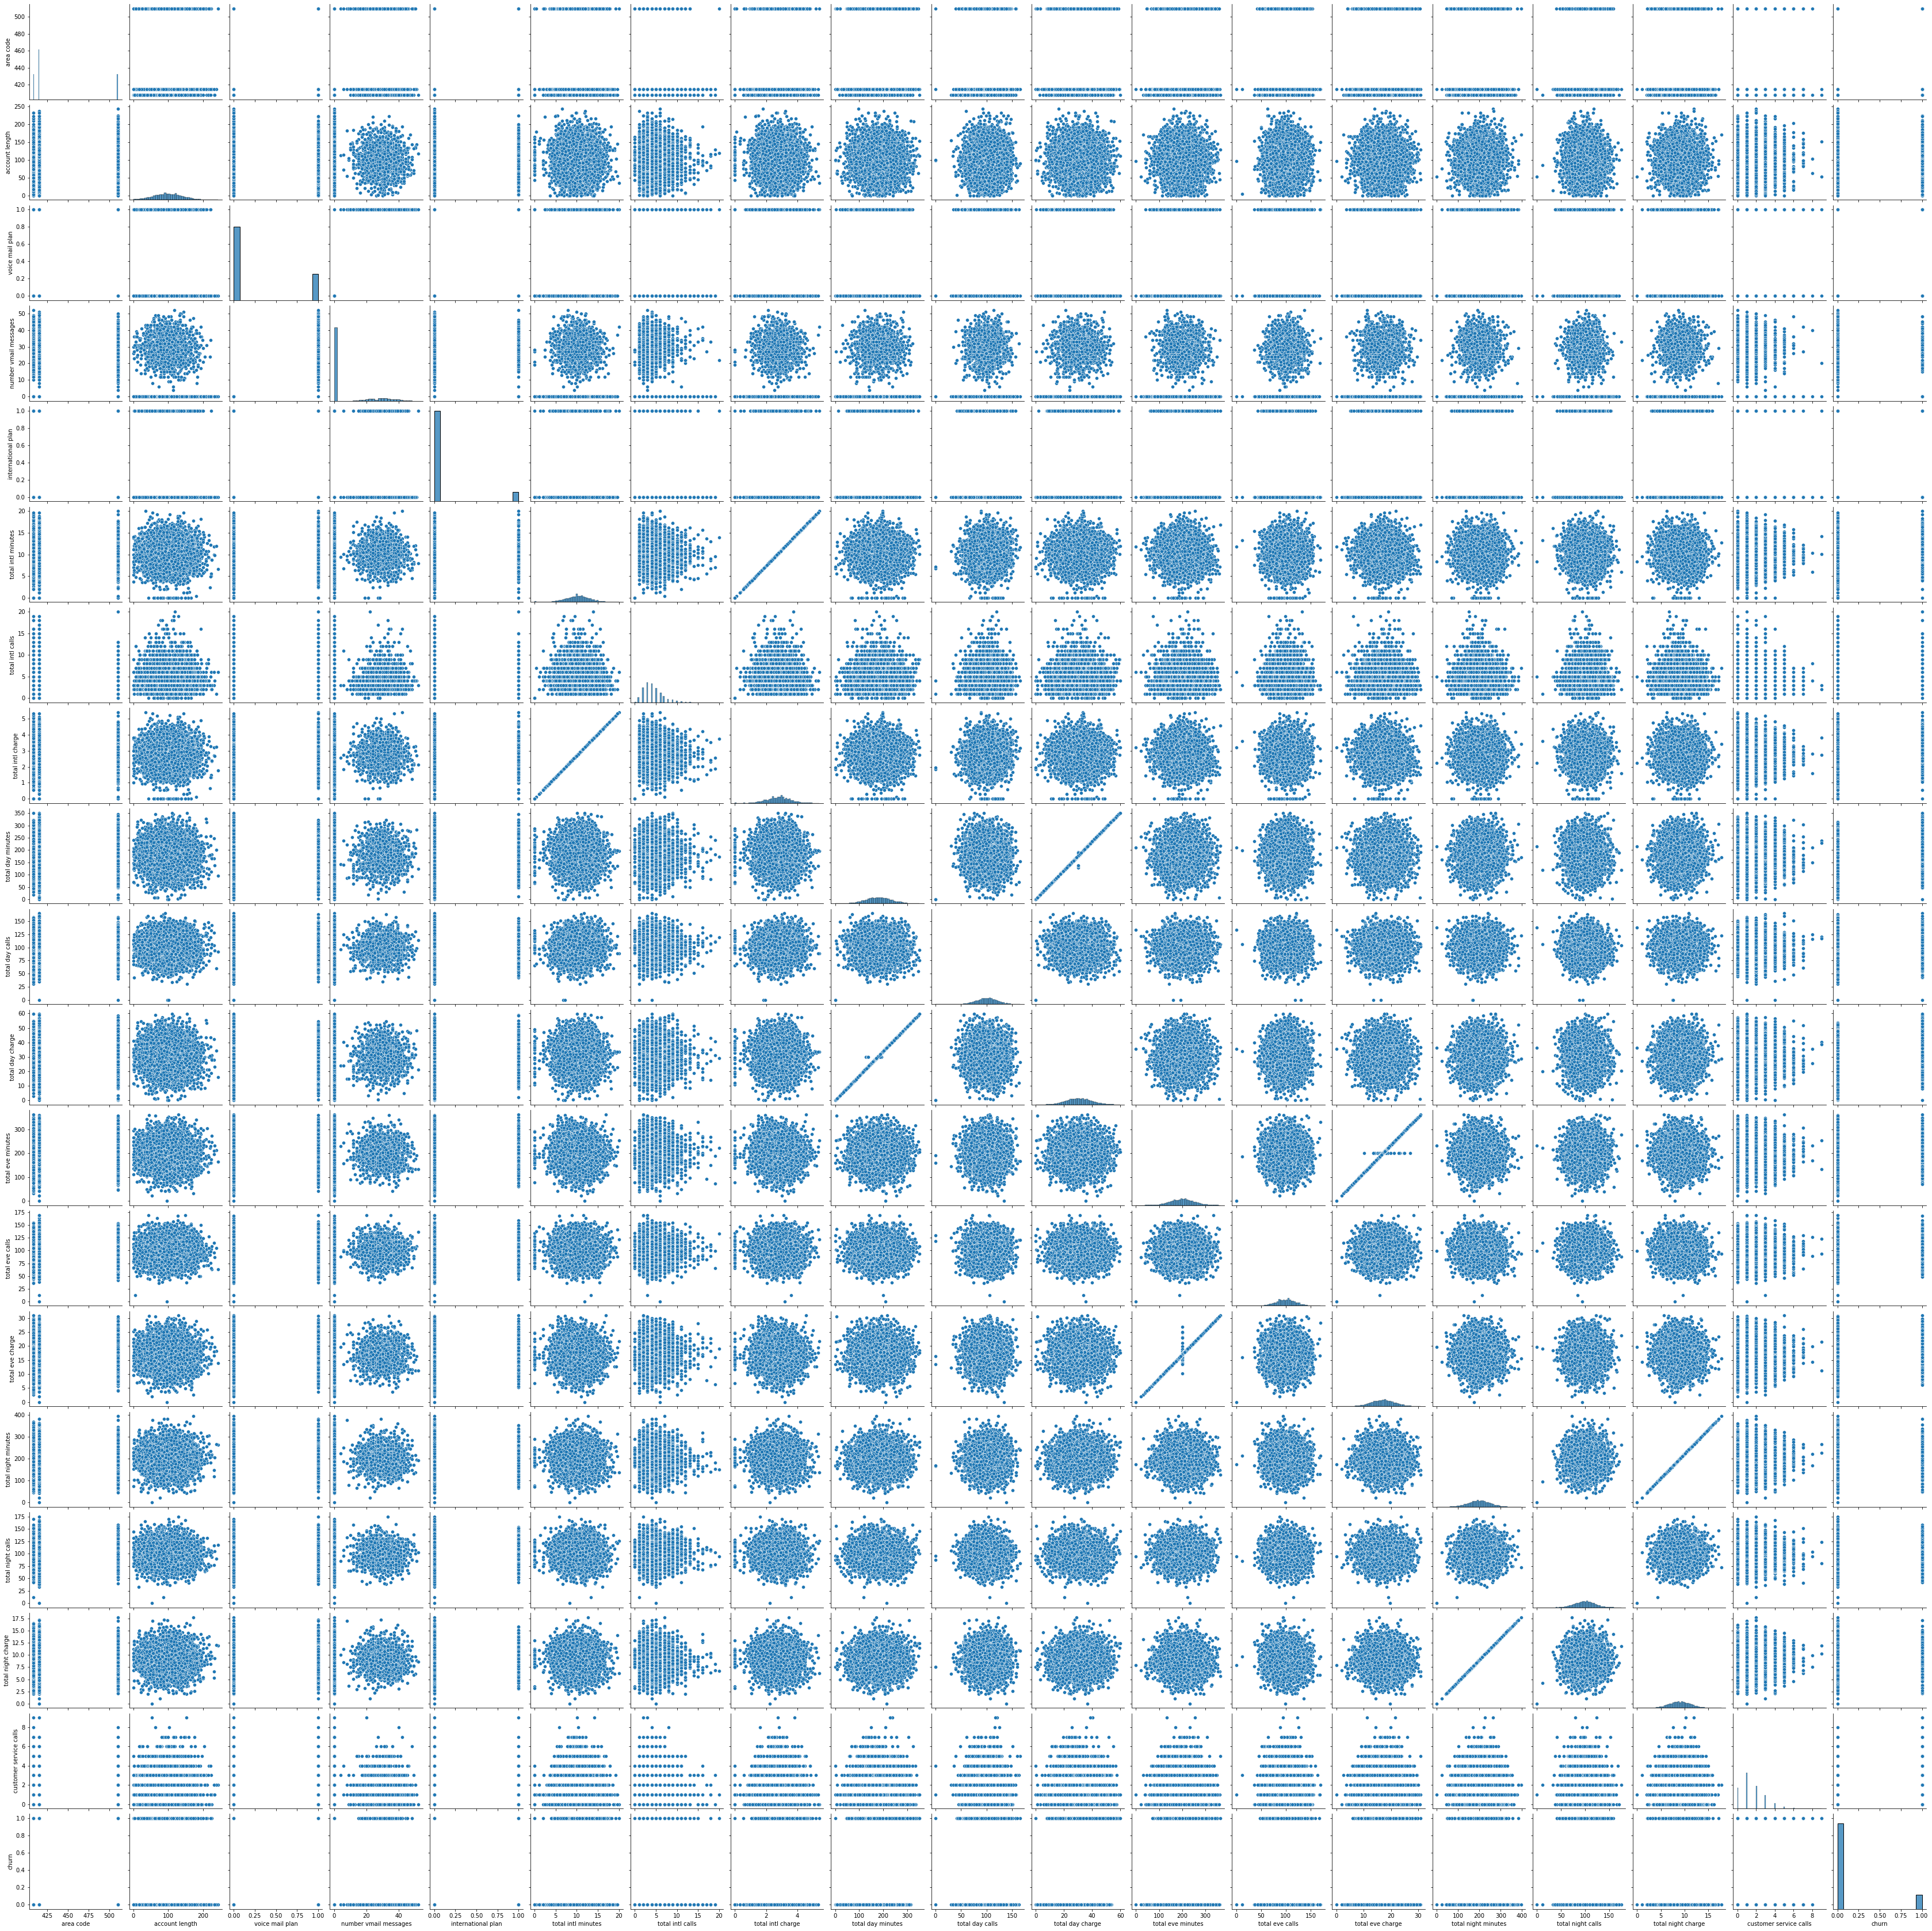

In [21]:
sns.pairplot(data=churn)

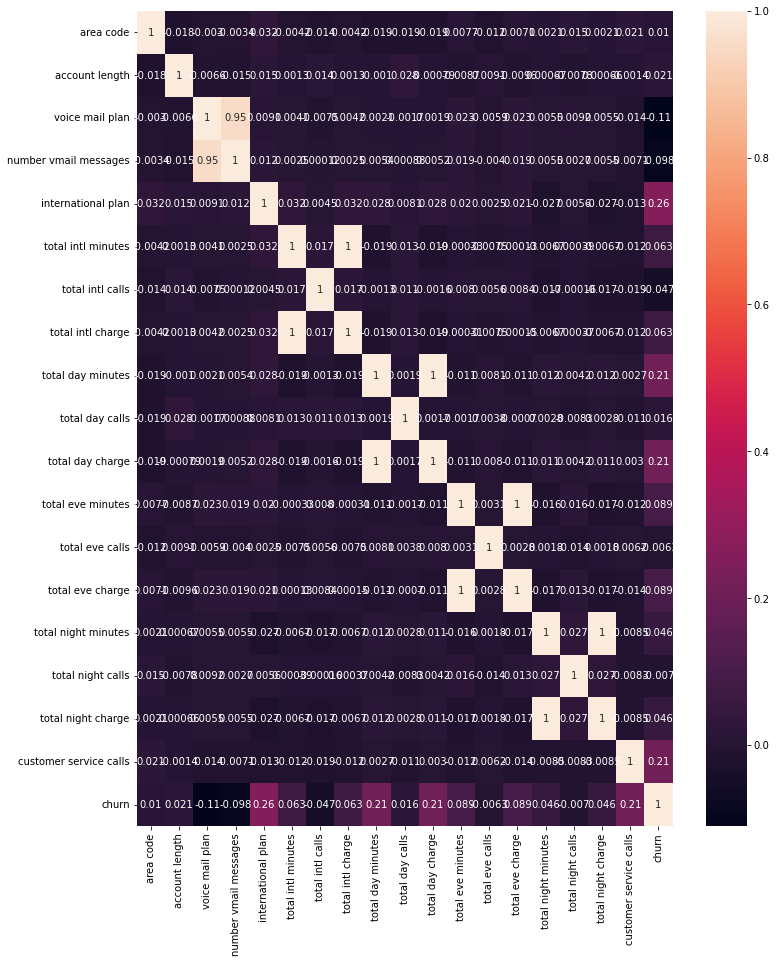

In [22]:
#Heatmap to view the correaltion
fig = plt.figure(figsize=(12,15))
sns.heatmap(churn.corr(),annot=True)
plt.show()
#Here we can see the correlation between 
#international minutes and international charge,
#day charge and day minutes,
#eve charge and eve minutes,
#night charge and night minutes

ANALYSIS OF THE CHURN RATE 

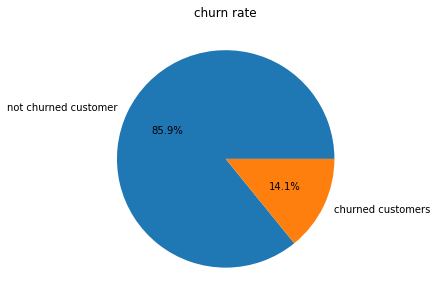

In [23]:
#to visulaize the churn rate of the customers
data=churn['churn'].value_counts()
fig = plt.figure(figsize =(10, 5))
plt.pie(data, labels =['not churned customer','churned customers'],autopct='%.1f%%')
plt.title('churn rate')
plt.show()

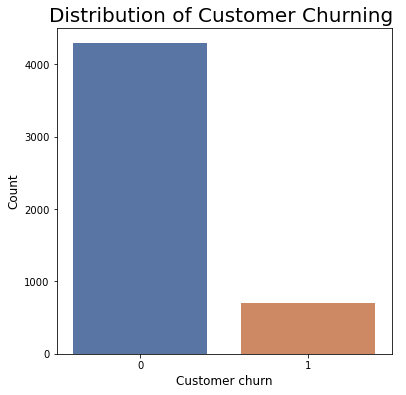

In [24]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = churn.churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()


Churn customer is 14.1% and non churned customer is 85.9%

In [25]:
def diff_bar(x,y):
    
    churn.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

ANALYSIS OF THE CHURN RATE BASED ON THE CUSTOMERS AREA CODE 

In [26]:
# DISTRIBUTION OF AREA CODE
churn['area code'].value_counts(normalize=True)*100

415    49.90
408    25.18
510    24.92
Name: area code, dtype: float64

The area code is divided as 50%, 25% and 25% for 415, 408 and 510 area codes

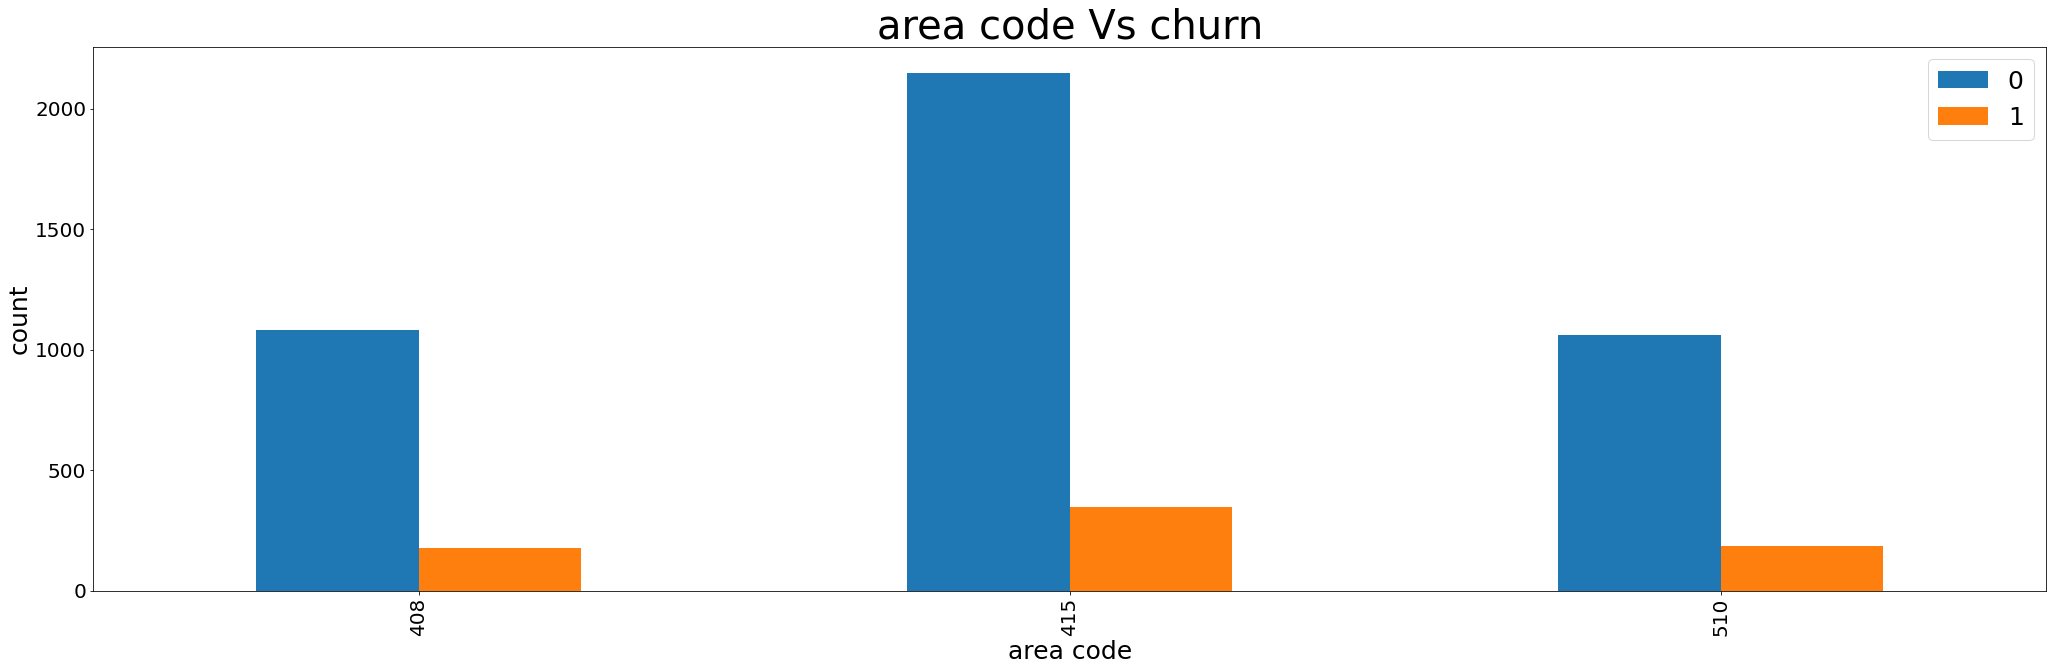

In [27]:
diff_bar('area code','churn')

Churned customers are more in  the area 415 compared with other areas

ANALYSIS OF THE CHURN RATE BASED ON THE STATES OF THE CUSTOMERS

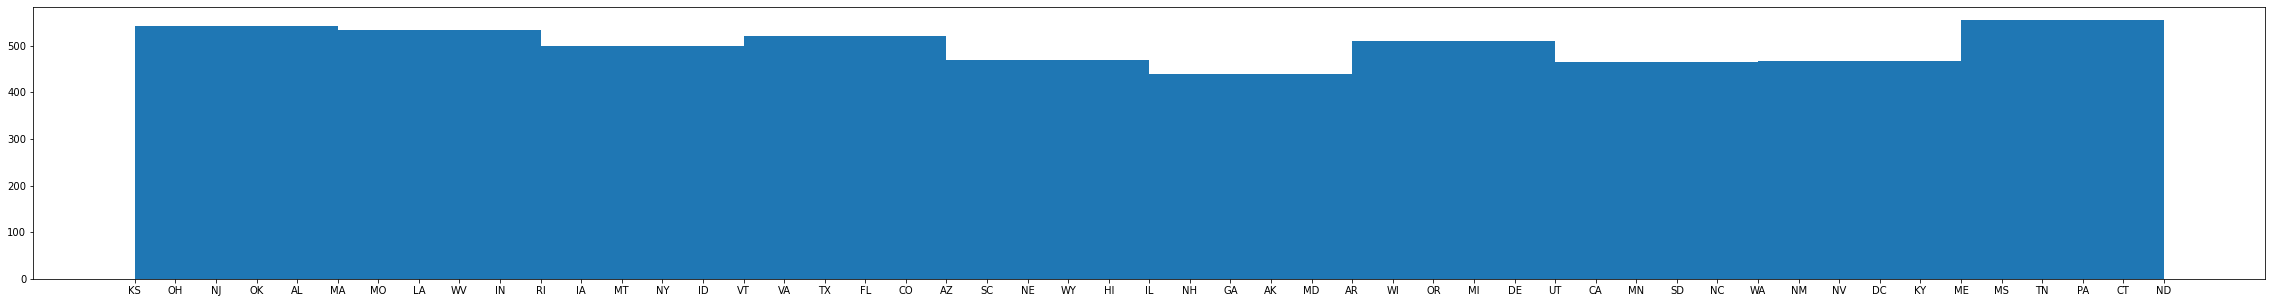

In [28]:
#Plotting the customers across different states
fig, ax=plt.subplots(figsize=(40, 5))
ax.hist(churn['state']);

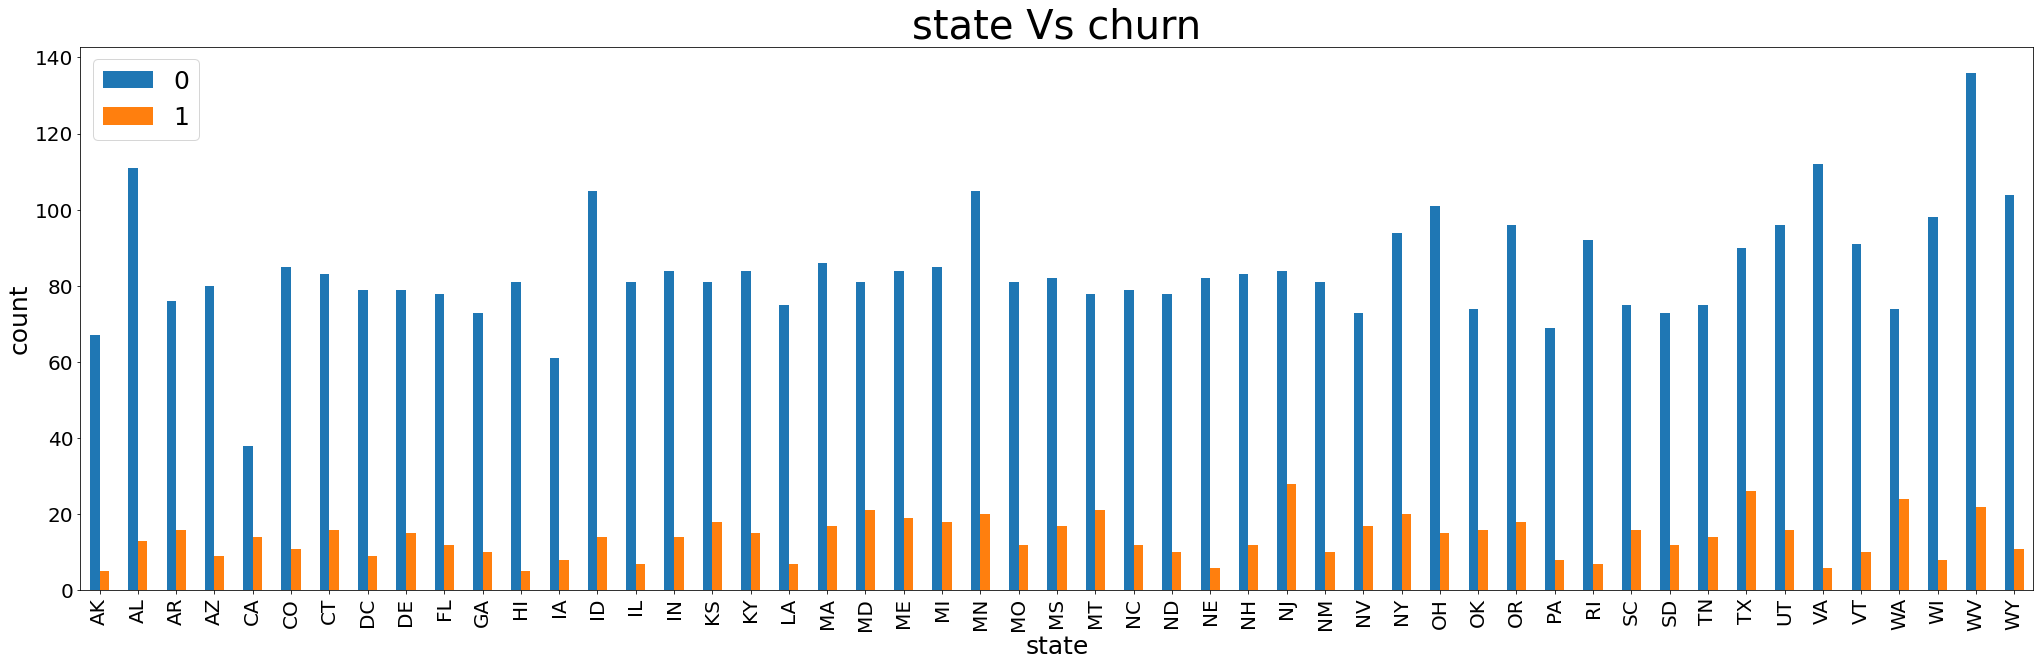

In [29]:
#State Wise Churning of customer
diff_bar('state','churn')

ANALYSIS OF THE CHURN RATE BASED ON THE CUSTOMERS WHO OPTED FOR VOICE MAIL PLAN OR NOT

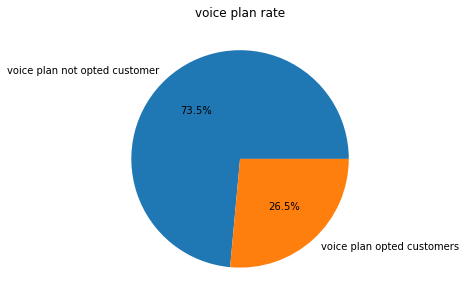

In [30]:
#to visualize the number of customers having voice plan or not
data=churn['voice mail plan'].value_counts()
fig = plt.figure(figsize =(10, 5))
plt.pie(data, labels =['voice plan not opted customer','voice plan opted customers'],autopct='%.1f%%')
plt.title('voice plan rate')
plt.show()

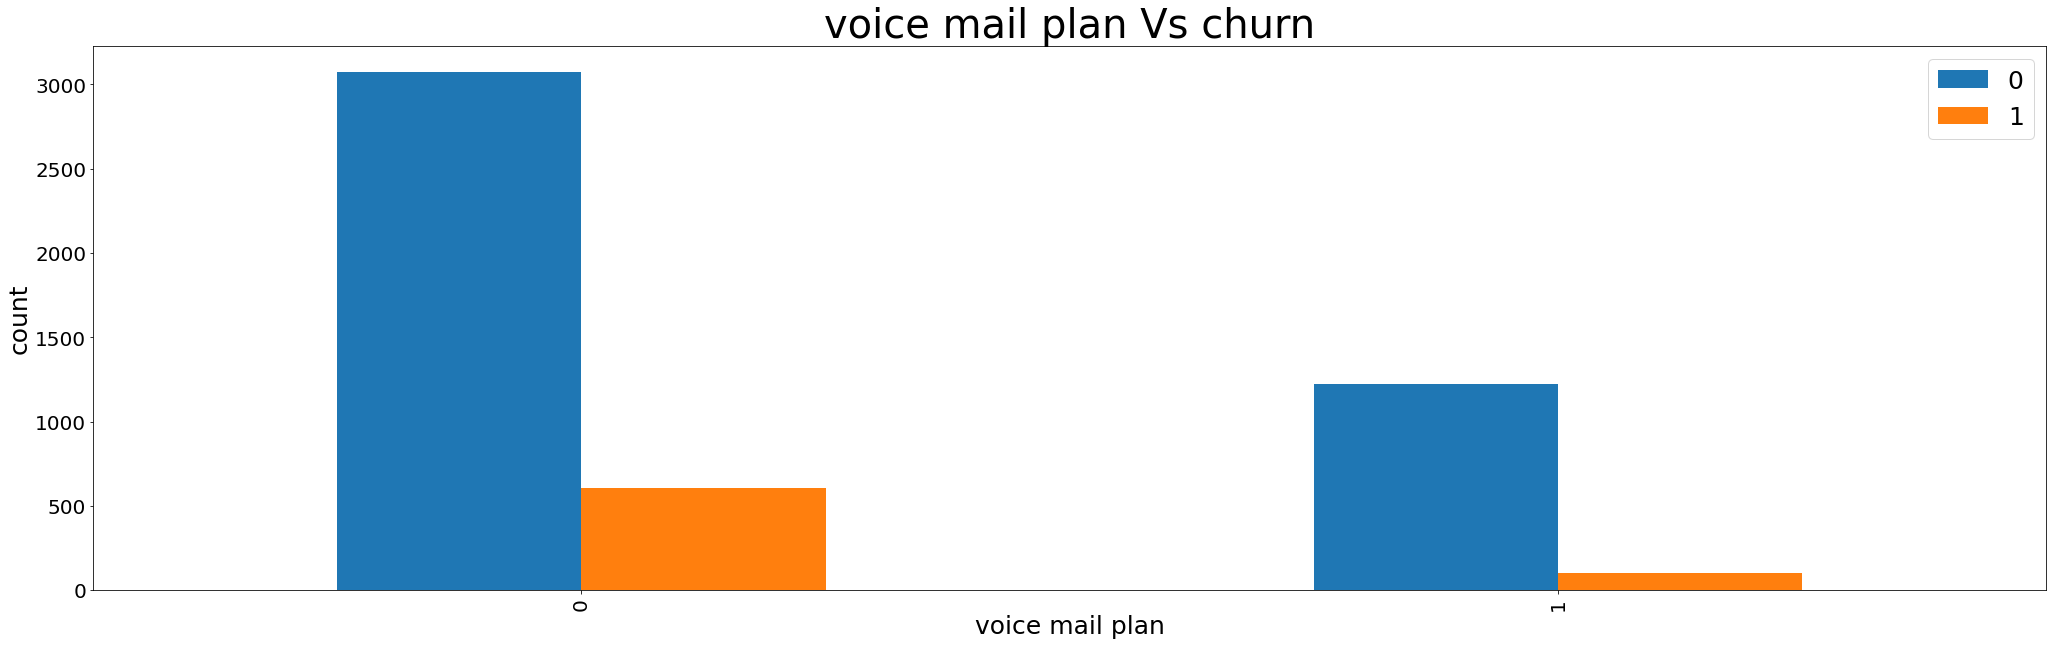

In [31]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('voice mail plan','churn')

The customers who opted for voice plan has higher churn rate compared to the customer who are not having the voice mail plan.
It infers the telecom company needs to work more on the voice mail plan by giving more plan benefits, more network coverage and so on to reduce the churn rate.

ANALYSIS OF THE CHURN RATE BASED ON THE CUSTOMERS WHO OPTED FOR INTERNATIONAL PLAN OR NOT

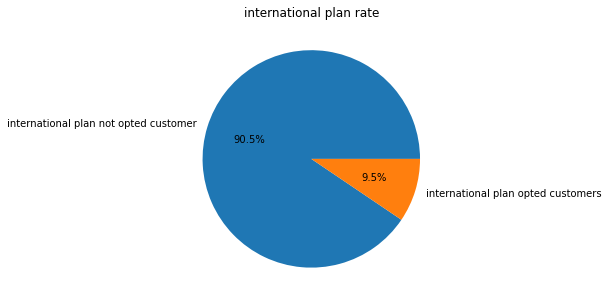

In [32]:
#to visualize the number of customers having international plan or not
data=churn['international plan'].value_counts()
fig = plt.figure(figsize =(10, 5))
plt.pie(data, labels =['international plan not opted customer','international plan opted customers'],autopct='%.1f%%')
plt.title('international plan rate')
plt.show()

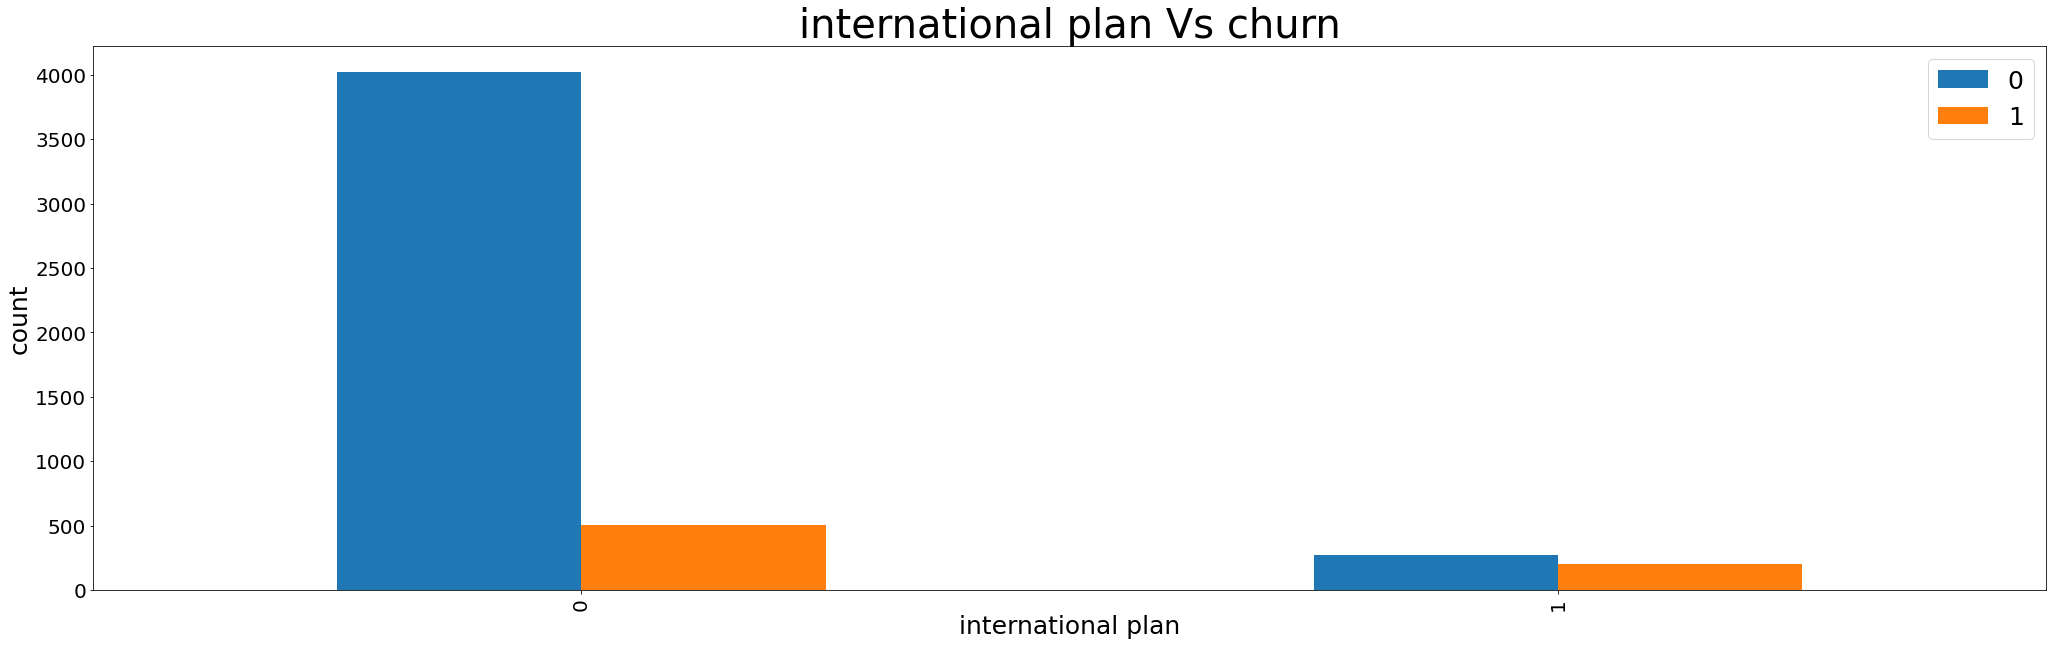

In [33]:
#International_Plan Wise Churning of customer
diff_bar('international plan','churn')

Churn rate is high for the customer who are opted for international plan. It means the telecom  company need to concentrate more on the internation plan services

ANALYSIS OF THE CHURN RATE BASED ON THE FREQUENCY OF THE CUSTOMER SERVICE CALLS

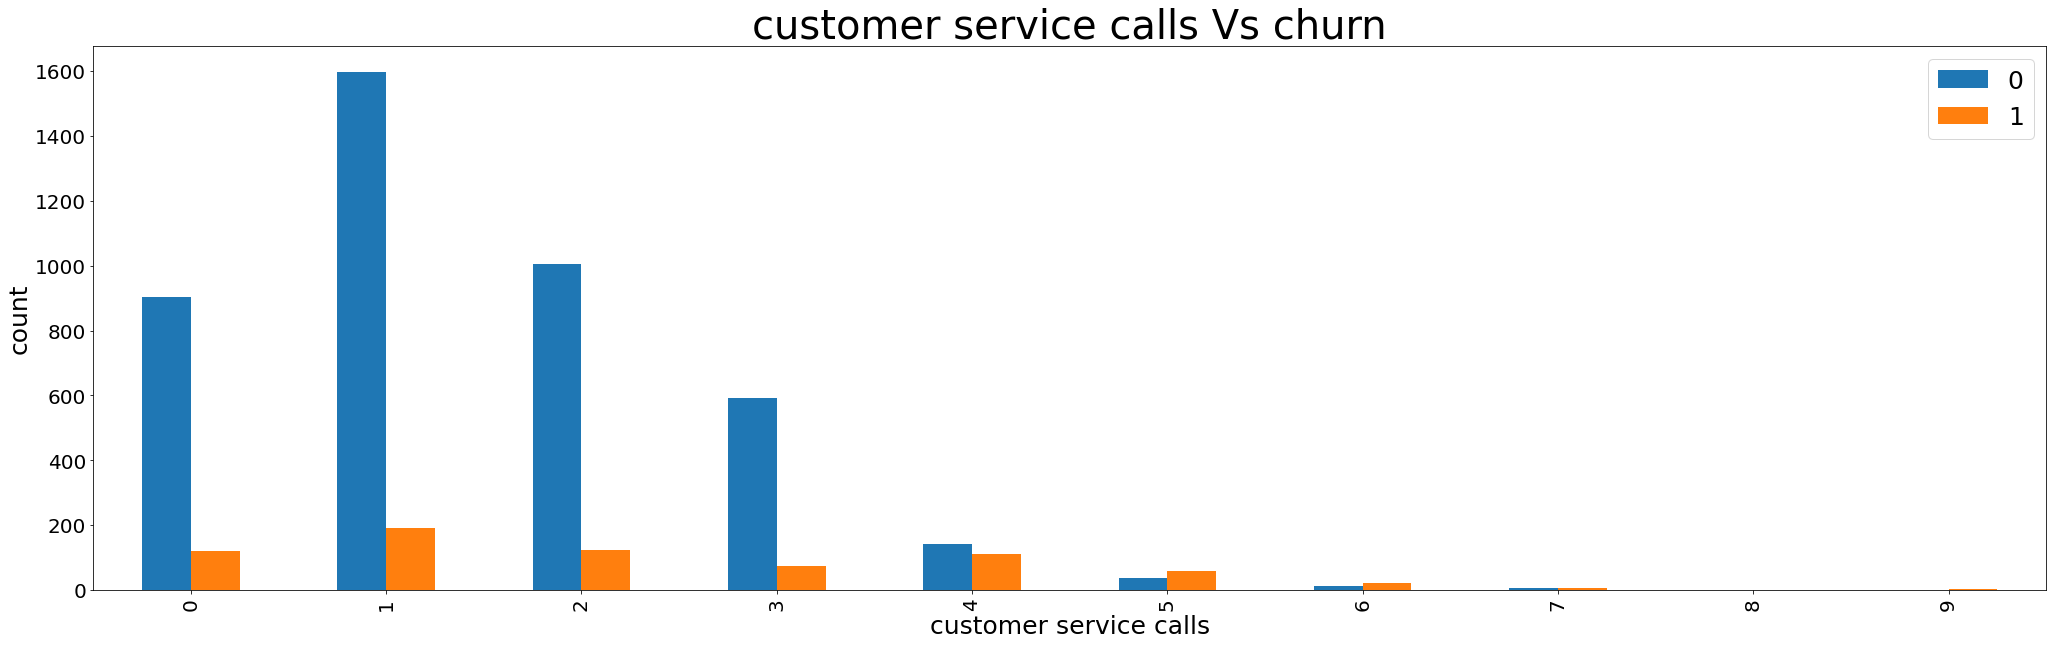

In [34]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('customer service calls','churn')

The above graph clearly shows that customer service needs to be improved as the churn is higher for the customers who called customer service more than 3 times.

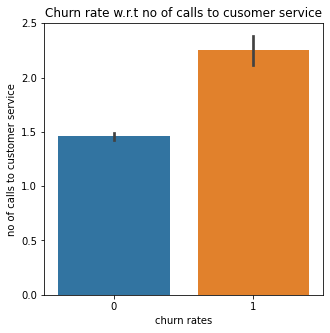

In [35]:
#checking for the churn rate with respect to customer service calls
fig= plt.figure(figsize = (5,5))
sns.barplot(x='churn', y='customer service calls',data=churn)
plt.title("Churn rate w.r.t no of calls to cusomer service")
plt.xlabel("churn rates")
plt.ylabel("no of calls to customer service")
plt.show()

Lower the calls to customer service, lower the churn rate and vice versa

ANALYSIS OF THE CHURN RATE BASED ON THE CUSTOMERS ACCOUNT LENGTH i.e., how long the customers account is active

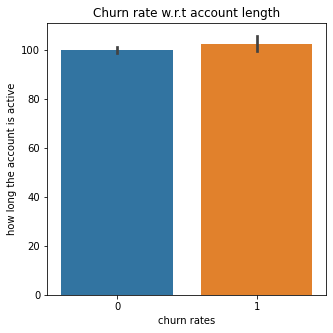

In [36]:
#checking for the churn rate with respect to account length
fig= plt.figure(figsize = (5,5))
sns.barplot(x='churn', y='account length',data=churn)
plt.title("Churn rate w.r.t account length")
plt.xlabel("churn rates")
plt.ylabel("how long the account is active")
plt.show()

The account is active for almost same time for both the customers who are churned and not churned.

SCATTER PLOT ANALYSIS BETWEEN INTERNATIONAL PLAN,DAY PLAN,EVENING PLAN,NIGHT PLAN GIVEN BY THE TELECOM COMPANY

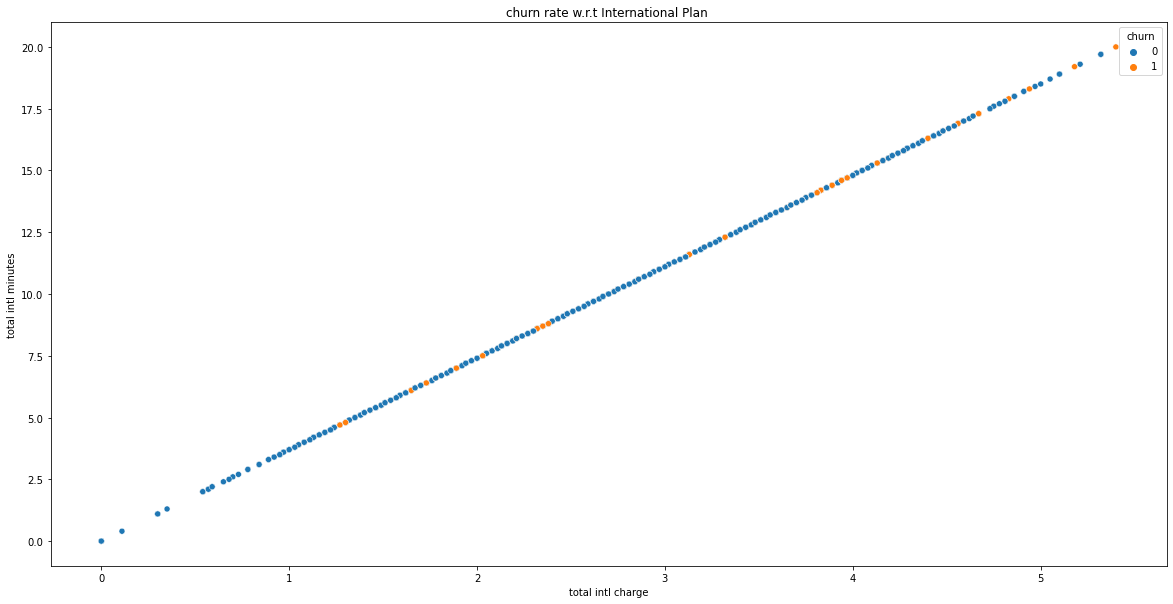

In [37]:
fig=plt.figure(figsize=(20,10))
sns.scatterplot(x='total intl charge',y='total intl minutes',hue='churn',data=churn)
plt.title("churn rate w.r.t International Plan ")
plt.show()

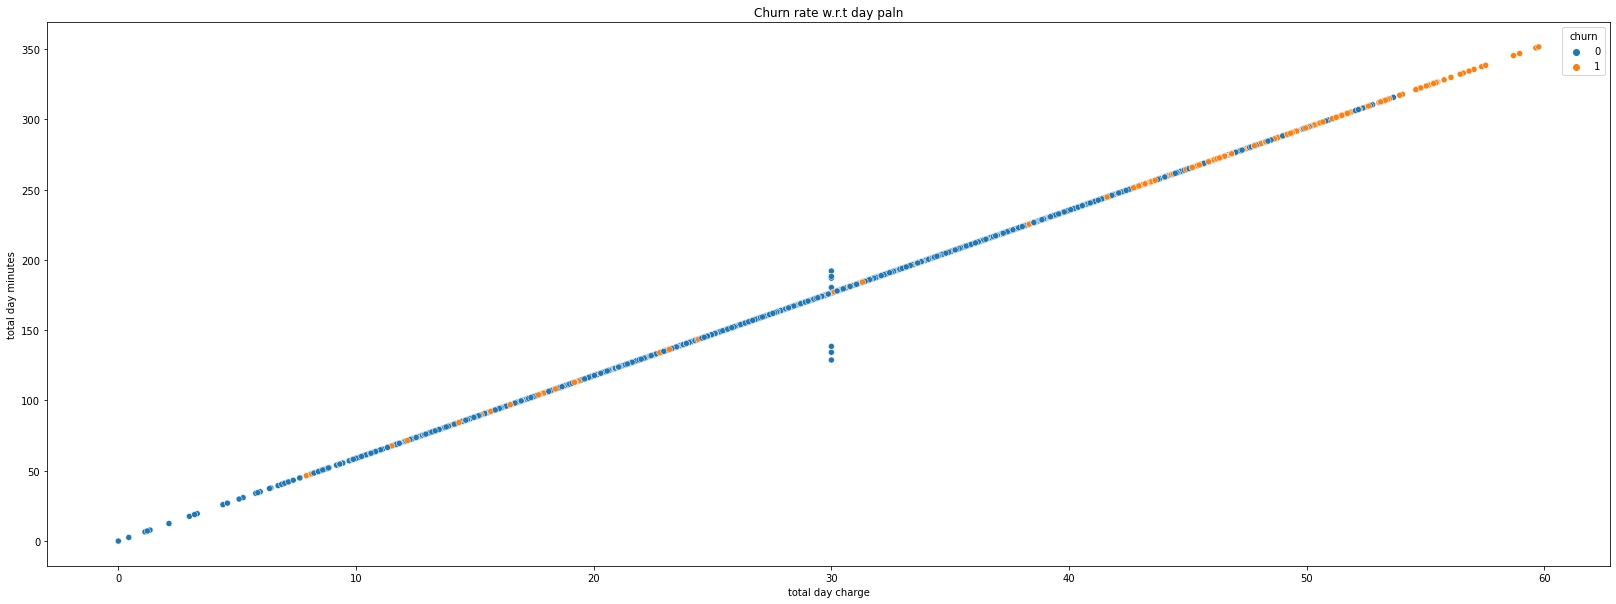

In [38]:
fig= plt.figure(figsize = (28,10))
sns.scatterplot(x='total day charge', y='total day minutes',hue='churn',data=churn)
plt.title("Churn rate w.r.t day paln")
plt.show()

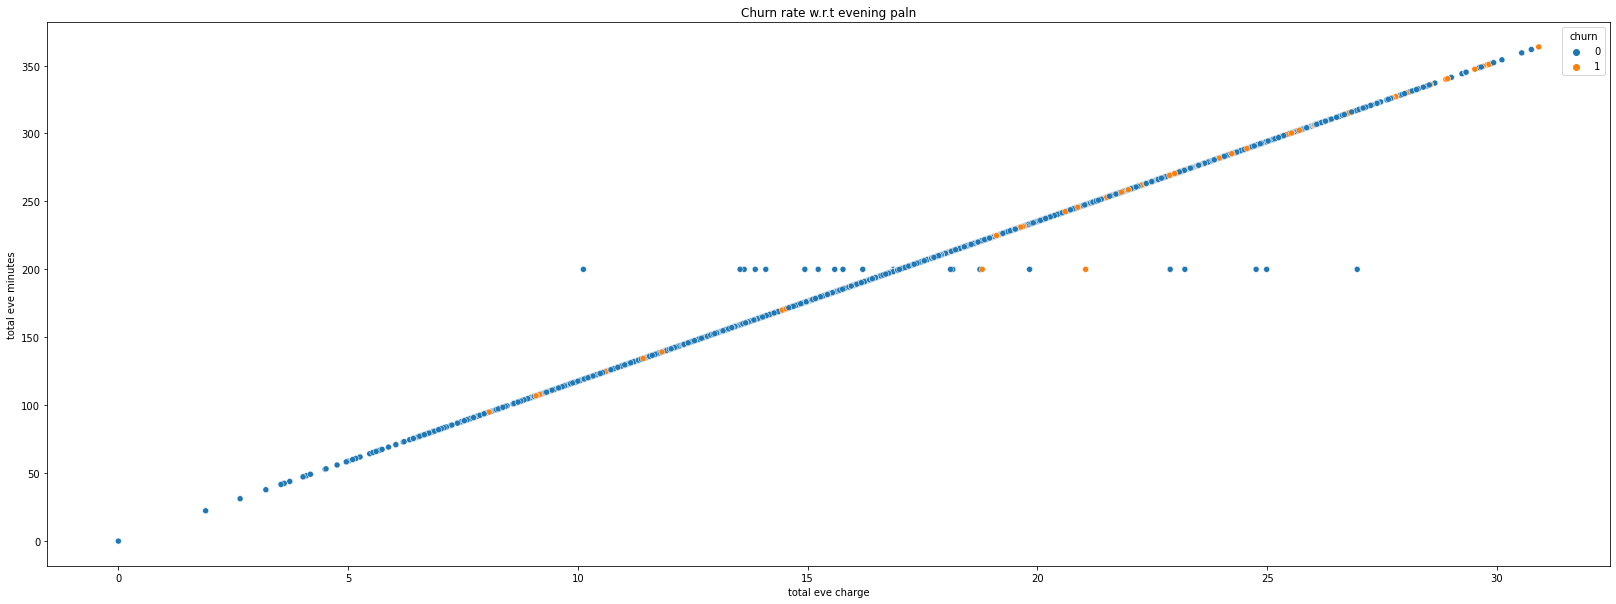

In [39]:
fig= plt.figure(figsize = (28,10))
sns.scatterplot(x='total eve charge', y='total eve minutes',hue='churn',data=churn)
plt.title("Churn rate w.r.t evening paln")
plt.show()

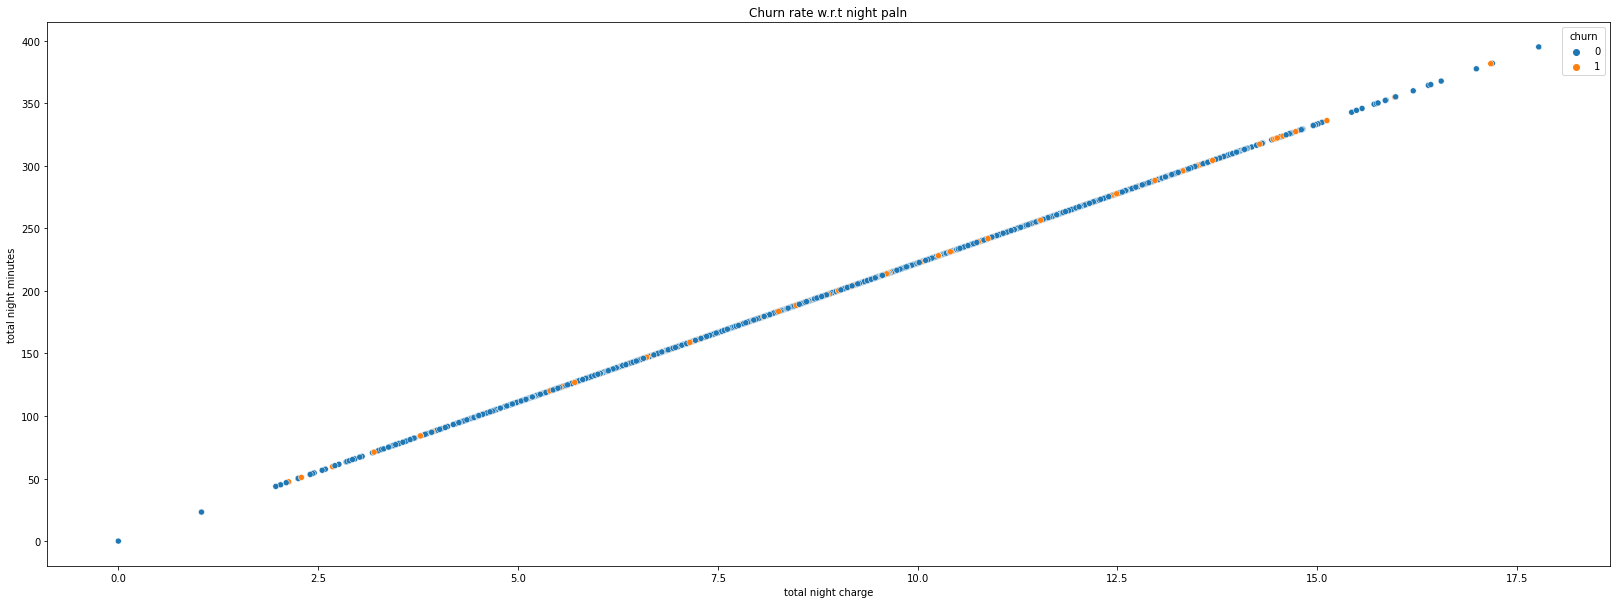

In [40]:
fig= plt.figure(figsize = (28,10))
sns.scatterplot(x='total night charge', y='total night minutes',hue='churn',data=churn)
plt.title("Churn rate w.r.t night paln")
plt.show()

OUTLIER ANALYSIS

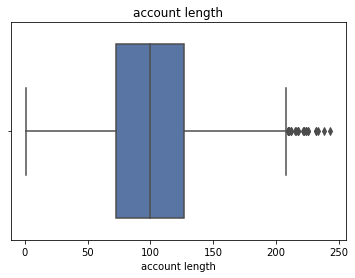

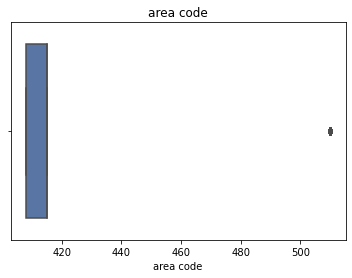

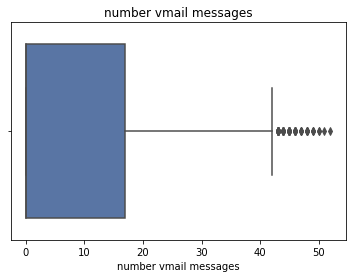

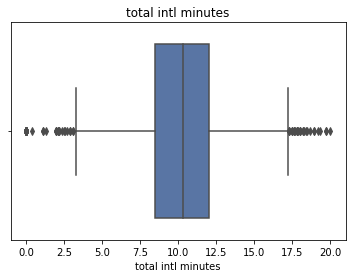

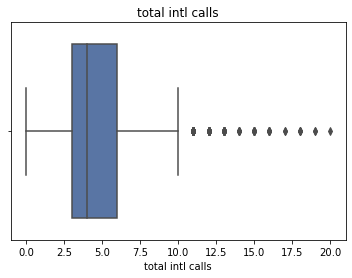

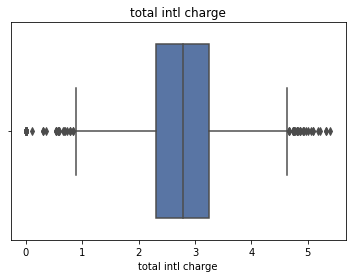

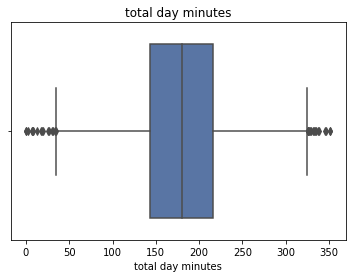

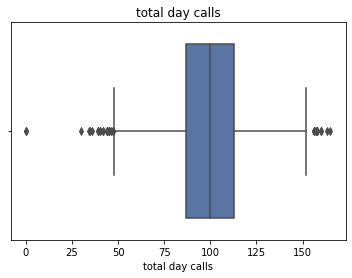

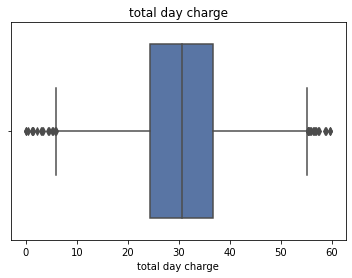

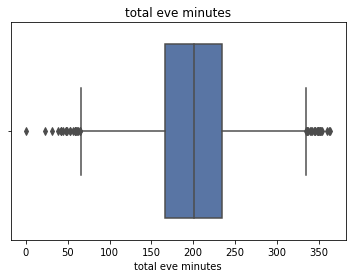

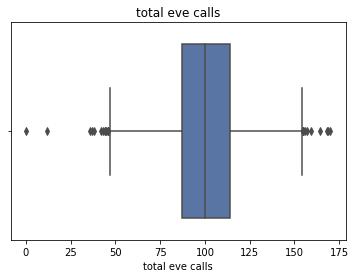

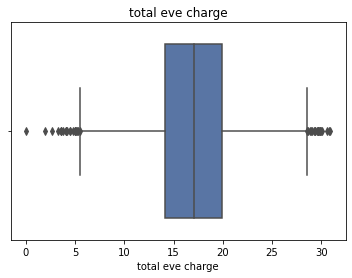

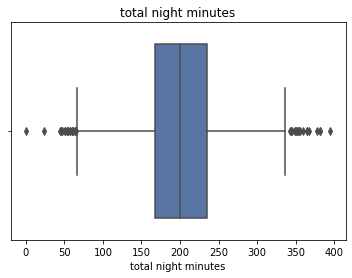

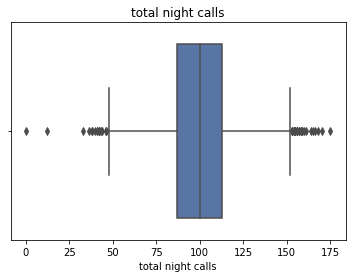

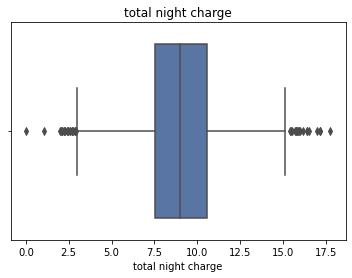

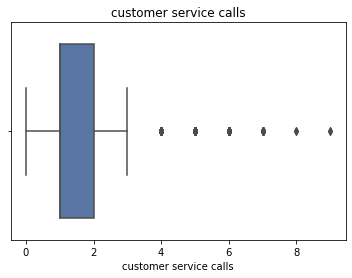

In [12]:
##Plotting Box Plot for all the numeric customer features
columns=['account length','area code','number vmail messages', 'total intl minutes', 'total intl calls', 'total intl charge', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'customer service calls']
for i in columns:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(churn[i],palette="deep")
    plt.title(i)
    plt.show()


TREATING OUTLIERS AND CONVERTING THEM TO NAN

In [13]:
for i in columns:
    #print(i)
    q75, q25 = np.percentile(churn.loc[:,i], [75 ,25])
    iqr = q75 - q25
    lower_whisker= q25 - (iqr*1.5)
    upper_whisker= q75 + (iqr*1.5)

In [14]:
#converting to nan
churn.loc[churn.loc[:,i] < lower_whisker,i] = np.nan
churn.loc[churn.loc[:,i] > upper_whisker,i] = np.nan
print('{var} -----> {X}   Missing'.format(var = i, X = (churn.loc[:,i].isnull().sum())))

customer service calls -----> 399   Missing


In [15]:
# Imputing with mean
for i in columns:
    print (i)
    churn = churn.apply(lambda x:x.fillna(churn.loc[:,i].mean()))   
    

account length
area code
number vmail messages
total intl minutes
total intl calls
total intl charge
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
customer service calls


In [16]:
churn.head()

state  area code  account length  voice mail plan  number vmail messages  \
0    KS        415             128                1                     25   
1    OH        415             107                1                     26   
2    NJ        415             137                0                      0   
3    OH        408              84                0                      0   
4    OK        415              75                0                      0   

   international plan  total intl minutes  total intl calls  \
0                   0                10.0                 3   
1                   0                13.7                 3   
2                   0                12.2                 5   
3                   1                 6.6                 7   
4                   1                10.1                 3   

   total intl charge  total day minutes  total day calls  total day charge  \
0               2.70              265.1              110             45.07   
1               3.70              161.6              123             27.47   
2               3.29              243.4              114             41.38   
3               1.78              299.4               71             50.90   
4               2.73              166.7              113             28.34   

   total eve minutes  total eve calls  total eve charge  total night minutes  \
0              197.4               99             16.78                244.7   
1              195.5              103             16.62                254.4   
2              121.2              110             10.30                162.6   
3               61.9               88              5.26                196.9   
4              148.3              122             12.61                186.9   

   total night calls  total night charge  customer service calls  churn  
0                 91               11.01                     1.0      0  
1                103               11.45                     1.0      0  
2                104                7.32                     0.0      0  
3                 89                8.86                     2.0      0  
4                121                8.41                     3.0      0

FEATURE IMPORTANCE

FEATURE EXTRACTION

In [17]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
remove = ['state','total day charge','total eve charge','total night charge','total intl charge']
churn =churn.drop(remove,axis=1)

In [18]:
churn.head()

area code  account length  voice mail plan  number vmail messages  \
0        415             128                1                     25   
1        415             107                1                     26   
2        415             137                0                      0   
3        408              84                0                      0   
4        415              75                0                      0   

   international plan  total intl minutes  total intl calls  \
0                   0                10.0                 3   
1                   0                13.7                 3   
2                   0                12.2                 5   
3                   1                 6.6                 7   
4                   1                10.1                 3   

   total day minutes  total day calls  total eve minutes  total eve calls  \
0              265.1              110              197.4               99   
1              161.6              123              195.5              103   
2              243.4              114              121.2              110   
3              299.4               71               61.9               88   
4              166.7              113              148.3              122   

   total night minutes  total night calls  customer service calls  churn  
0                244.7                 91                     1.0      0  
1                254.4                103                     1.0      0  
2                162.6                104                     0.0      0  
3                196.9                 89                     2.0      0  
4                186.9                121                     3.0      0

In [19]:
churn.shape

(5000, 15)

In [20]:
#updating the column feature after removing the correlated variables
columns = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes','total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls','customer service calls']

FEATURE SCALING

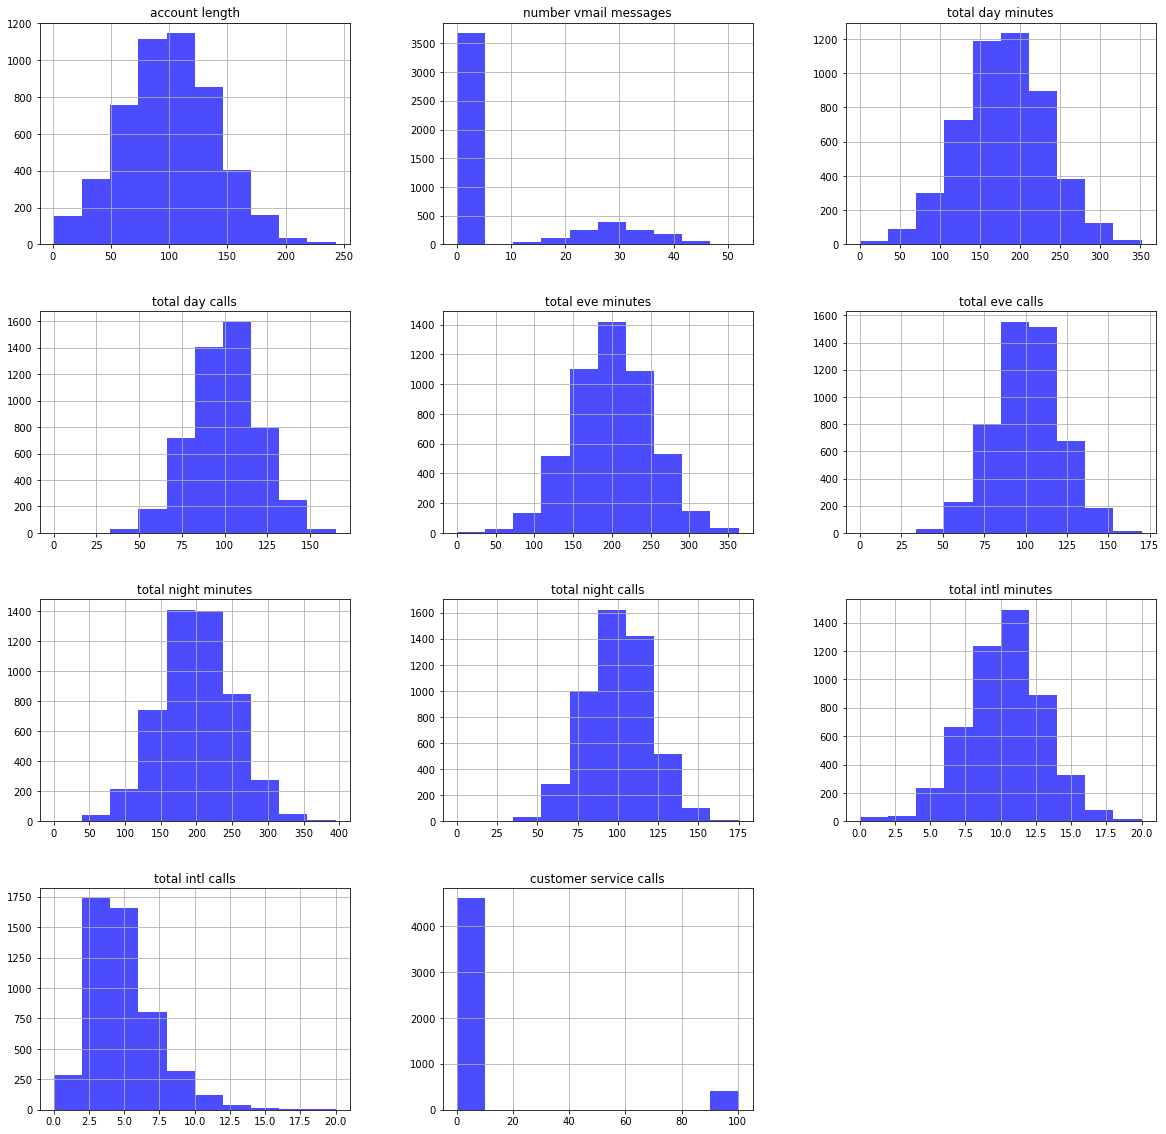

In [50]:
#Distribution of numeric customer features
churn[columns].hist(figsize=(20,20),color='b',alpha = 0.7)
plt.show()

In [51]:
# #Histogram breakdown by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()


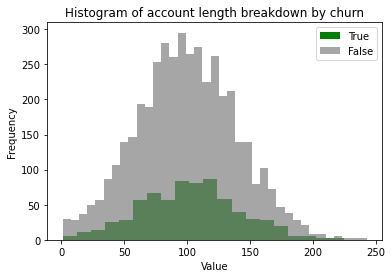

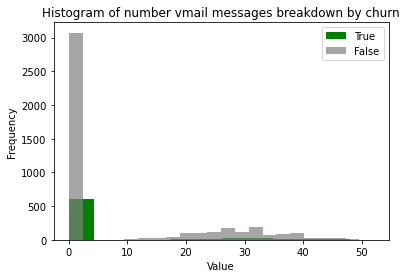

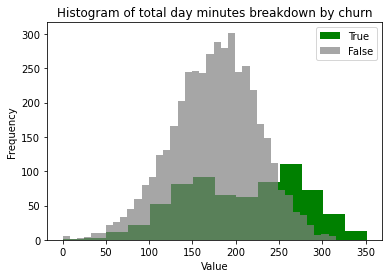

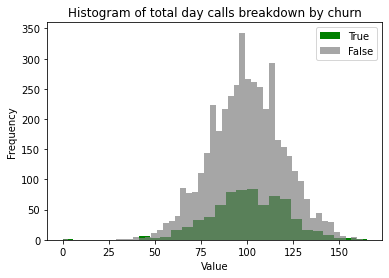

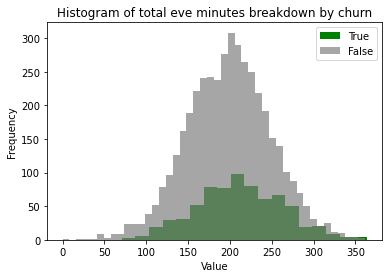

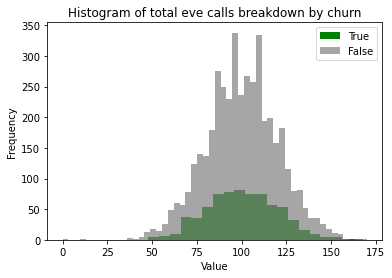

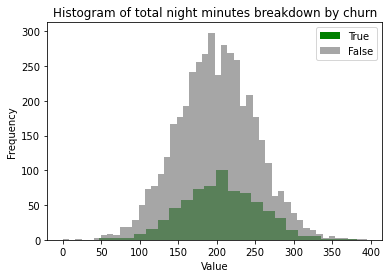

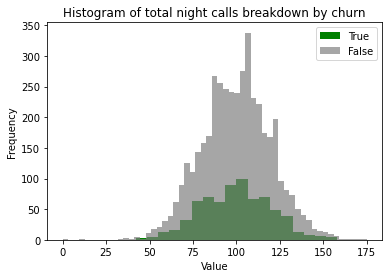

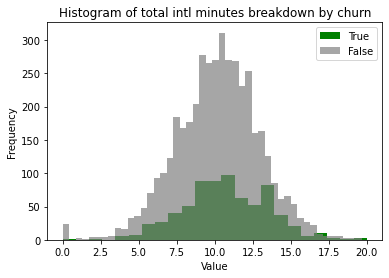

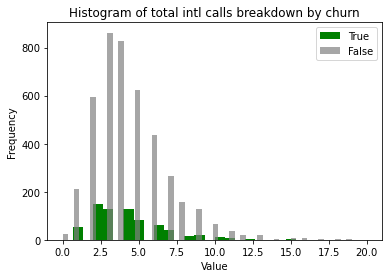

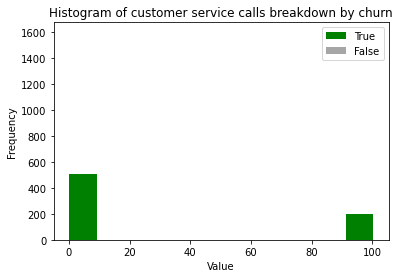

In [52]:
for i in columns:
    #print(i)
    plot_hist_y(churn[i],churn.churn)

From the above histogram graph we can infere that most of the data is uniformally distributed , Hence Using data Standardization/Z-Score here

FEATURE SCALING USING STANDARDIZATION

In [21]:
def scale_standard(df):
    for i in columns:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [22]:
#Standardizing Scale
churn = scale_standard(churn)

In [23]:
churn.head()

area code  account length  voice mail plan  number vmail messages  \
0        415        0.698872                1               1.273018   
1        415        0.169832                1               1.346838   
2        415        0.925603                0              -0.572492   
3        408       -0.409593                0              -0.572492   
4        415       -0.636324                0              -0.572492   

   international plan  total intl minutes  total intl calls  \
0                   0           -0.094800         -0.584177   
1                   0            1.245102         -0.584177   
2                   0            0.701899          0.229894   
3                   1           -1.326061          1.043965   
4                   1           -0.058586         -0.584177   

   total day minutes  total day calls  total eve minutes  total eve calls  \
0           1.573645         0.502773          -0.063005        -0.060071   
1          -0.346767         1.158306          -0.100679         0.141679   
2           1.171008         0.704476          -1.573916         0.494742   
3           2.210071        -1.463825          -2.749730        -0.614884   
4          -0.252138         0.654050          -1.036571         1.099993   

   total night minutes  total night calls  customer service calls  churn  
0             0.876911          -0.446883               -0.305891      0  
1             1.068885           0.154359               -0.305891      0  
2            -0.747937           0.204462               -0.343160      0  
3            -0.069103          -0.547090               -0.268622      0  
4            -0.267014           1.056222               -0.231353      0

In [25]:
churn.to_excel(r'I:\excelR\data1.xlsx', index=False)

FEATURE SELECTION 

In [26]:
from sklearn.model_selection import train_test_split
#Using train test split functionality for sampling
X = churn.iloc[:,:14]
y = churn.iloc[:,14]
y=y.astype('int')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
(X_train.shape),(y_train.shape)

((3350, 14), (3350,))

Using SMOTE ( SMOTE: Synthetic Minority Over-sampling Technique)

Due to target variable imbalance, it's good to over sample the minority class .

In [58]:
!pip install imblearn

In [28]:
#Upsampling the minority classes using SMOTE
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_resample(X_train,y_train)

In [29]:
(X_train_res.shape,y_train_res.shape)

((5738, 14), (5738,))

In [30]:
#before sampling the churn count
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))
#after sampling the churn out using SMOTE technique
print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))
#after sampling,the shapes of x and y variabes 
print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 481
Before UpSampling, counts of label '0': 2869 

After UpSampling, counts of label '1': 2869
After UpSampling, counts of label '0': 2869 

After UpSampling, the shape of train_X: (5738, 14)
After UpSampling, the shape of train_y: (5738,) 



DOWNSAMPLING 

In [31]:
non_churn_indices = churn[churn['churn'] == 0].index   # Get the record numbers of non-churn customers
no_churn = len(churn[churn['churn'] == 0])             # how many non-churn customers
print(no_churn)
churn_indices = churn[churn['churn'] == 1].index       # record number of the churned customers
churn1 = len(churn[churn['churn'] == 1])                # how many churnd customers
print(churn1)
random_indices = np.random.choice( non_churn_indices, no_churn - 200 , replace=False)
down_sample_indices = np.concatenate([churn_indices,random_indices]) 
down_sample = churn.loc[down_sample_indices]  # Extract all those records for churn and non-churn to create new set
down_sample.shape
down_sample.groupby(["churn"]).count() 

print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))

4293
707
After DownSampling, the shape of X_train: (3350, 14)
After DownSampling, the shape of X_test: (1650, 14) 



MODEL LEVEL FUNCTION

In [62]:
#prediction analysis

In [32]:
def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [64]:
#checking for the model that fits good 

In [34]:
#1.Random forest    
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train,y_train)
#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1409   15
1        64  162

Classification paradox :------->>
Accuracy :-  95.21

Specificity //  True Negative Rate :-  98.95

Sensivity // True Positive Rate // Recall :-  71.68

False Negative Rate :-  28.32

False Postive Rate :-  1.05

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1424
           1       0.92      0.72      0.80       226

    accuracy                           0.95      1650
   macro avg       0.94      0.85      0.89      1650
weighted avg       0.95      0.95      0.95      1650



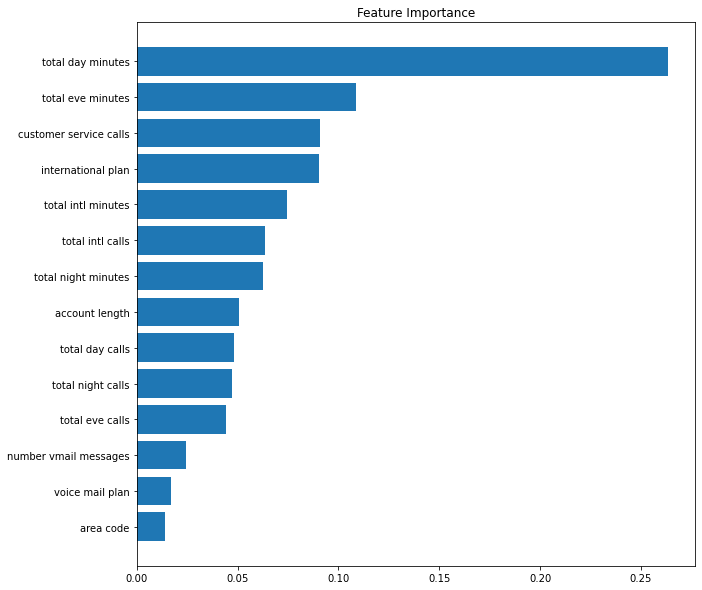

In [35]:
#Feature importance using Random Forest
#Calculating feature importances
importances = rf_model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::1]
# Rearrange feature names so they match the sorted feature importances
names = [churn.columns[i] for i in indices]
# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")
# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()

In [36]:
#2.Logistic Regression
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)
#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1146  278
1        48  178

Classification paradox :------->>
Accuracy :-  80.24

Specificity //  True Negative Rate :-  80.48

Sensivity // True Positive Rate // Recall :-  78.76

False Negative Rate :-  21.24

False Postive Rate :-  19.52

              precision    recall  f1-score   support

           0       0.96      0.80      0.88      1424
           1       0.39      0.79      0.52       226

    accuracy                           0.80      1650
   macro avg       0.68      0.80      0.70      1650
weighted avg       0.88      0.80      0.83      1650



In [37]:
#3.KNN
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)
#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1150  274
1        81  145

Classification paradox :------->>
Accuracy :-  78.48

Specificity //  True Negative Rate :-  80.76

Sensivity // True Positive Rate // Recall :-  64.16

False Negative Rate :-  35.84

False Postive Rate :-  19.24

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1424
           1       0.35      0.64      0.45       226

    accuracy                           0.78      1650
   macro avg       0.64      0.72      0.66      1650
weighted avg       0.85      0.78      0.81      1650



In [38]:
#4.Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)
#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1138  286
1        54  172

Classification paradox :------->>
Accuracy :-  79.39

Specificity //  True Negative Rate :-  79.92

Sensivity // True Positive Rate // Recall :-  76.11

False Negative Rate :-  23.89

False Postive Rate :-  20.08

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1424
           1       0.38      0.76      0.50       226

    accuracy                           0.79      1650
   macro avg       0.67      0.78      0.69      1650
weighted avg       0.88      0.79      0.82      1650



In [39]:
import sys
!{sys.executable} -m pip install xgboost

In [40]:
#5.XGboost Classifier
from xgboost import XGBClassifier
#model development
xgb_model=XGBClassifier().fit(X_train_res, y_train_res)
#model score on validation data set
pred(xgb_model,X_test,y_test)


CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1396   28
1        47  179

Classification paradox :------->>
Accuracy :-  95.45

Specificity //  True Negative Rate :-  98.03

Sensivity // True Positive Rate // Recall :-  79.2

False Negative Rate :-  20.8

False Postive Rate :-  1.97

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1424
           1       0.86      0.79      0.83       226

    accuracy                           0.95      1650
   macro avg       0.92      0.89      0.90      1650
weighted avg       0.95      0.95      0.95      1650



In [72]:
#6.Bagged Tree for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model_btc = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42).fit(X_train_res,y_train_res)
pred(model_btc,X_test,y_test)


CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1377   47
1        52  174

Classification paradox :------->>
Accuracy :-  94.0

Specificity //  True Negative Rate :-  96.7

Sensivity // True Positive Rate // Recall :-  76.99

False Negative Rate :-  23.01

False Postive Rate :-  3.3

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1424
           1       0.79      0.77      0.78       226

    accuracy                           0.94      1650
   macro avg       0.88      0.87      0.87      1650
weighted avg       0.94      0.94      0.94      1650



In [73]:
#7.Support vector machine
from sklearn.svm import SVC
#model development
model = SVC()
param= [{'kernel':['rbf'],'gamma':[50,5,10],'C':[15,14,13,12,11,10,0.1,0.001] }] #Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

In [76]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=param,cv=10)
gsv=grid.fit(X_train_res,y_train_res)
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 5, 'kernel': 'rbf'}, 0.8593599309216728)

In [77]:
clf = SVC(C=15,gamma=5,kernel='rbf')
f_model=clf.fit(X_train,y_train)
#model score on validation data set
y_pred=f_model.predict(X_test)
pd.crosstab(y_test,y_pred)

col_0     0
churn      
0      1424
1       226

In [95]:
y_pred=clf.predict(X_test)
acc=np.mean(y_pred==y_test)
acc
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1424
           1       0.00      0.00      0.00       226

    accuracy                           0.86      1650
   macro avg       0.43      0.50      0.46      1650
weighted avg       0.74      0.86      0.80      1650



In [78]:
#8.Decision tree classifier using gini criterion
from sklearn.tree import DecisionTreeClassifier
#model development
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)
#model score on validation data set
pred(model,X_test,y_test)


CONFUSION MATRIX ------->> 
col_0     0   1
churn          
0      1401  23
1       135  91

Classification paradox :------->>
Accuracy :-  90.42

Specificity //  True Negative Rate :-  98.38

Sensivity // True Positive Rate // Recall :-  40.27

False Negative Rate :-  59.73

False Postive Rate :-  1.62

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1424
           1       0.80      0.40      0.54       226

    accuracy                           0.90      1650
   macro avg       0.86      0.69      0.74      1650
weighted avg       0.90      0.90      0.89      1650



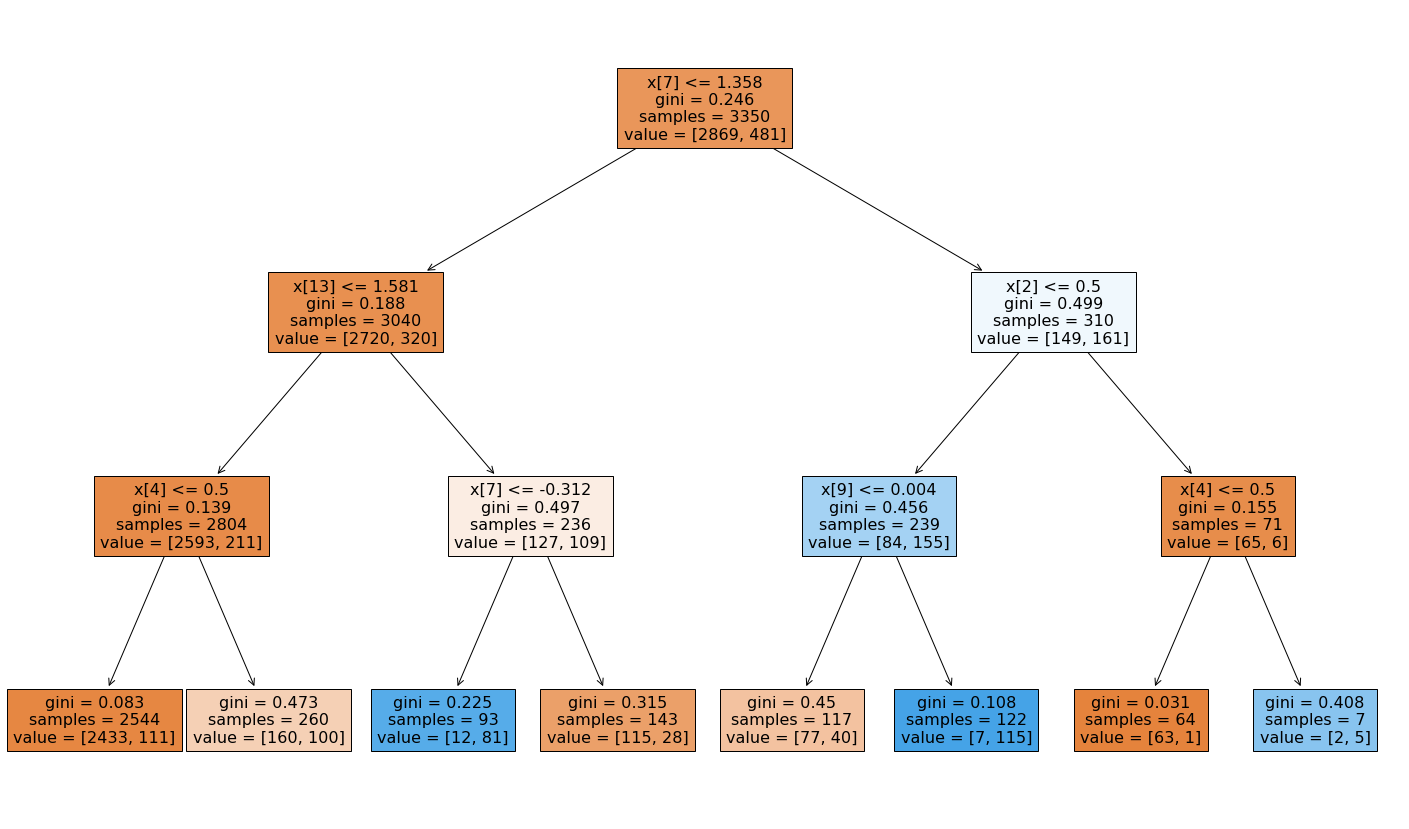

In [79]:
#Tree Structure
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)
plt.show()

In [80]:
#9.Decision tree classifier using entropy index
from sklearn.tree import DecisionTreeClassifier
#model development
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,y_train)
#model score on validation data set
pred(model,X_test,y_test)


CONFUSION MATRIX ------->> 
col_0     0   1
churn          
0      1397  27
1       132  94

Classification paradox :------->>
Accuracy :-  90.36

Specificity //  True Negative Rate :-  98.1

Sensivity // True Positive Rate // Recall :-  41.59

False Negative Rate :-  58.41

False Postive Rate :-  1.9

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1424
           1       0.78      0.42      0.54       226

    accuracy                           0.90      1650
   macro avg       0.85      0.70      0.74      1650
weighted avg       0.89      0.90      0.89      1650



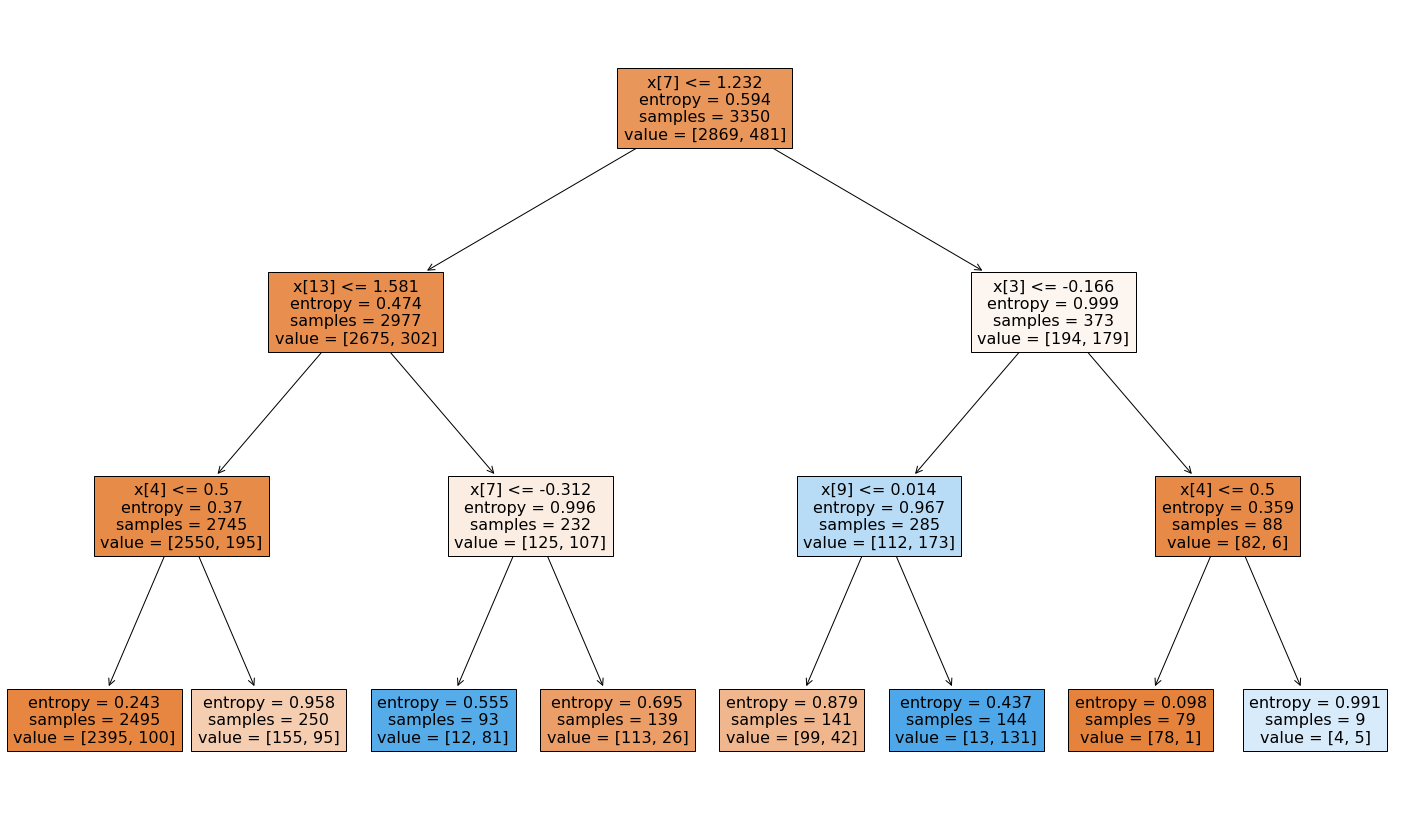

In [81]:
#Tree Structure
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)
plt.show()

From all the above models, the XGboost classifier model is good in accuracy.But by comparing all the metrics of F1 score, recall and precision we can conclude that Random forest model fits good than any other model.

Final Model :
From above random forest algorithm fits best for our dataset out of our tested models

AUC & ROC Curve

In [41]:
# Training Final Model With Optimum Parameters
final_Model = XGBClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=101, ...)

ROC AUC: 0.91


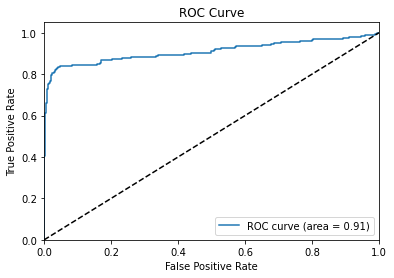

In [42]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

